In [2]:
import numpy as np
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [4]:
pima_dataset = np.loadtxt("dataset/pima-indians-diabetes.data", delimiter=",")

In [12]:
X = pima_dataset[:,0:8]
y = pima_dataset[:,8]

In [13]:
X.shape

(768, 8)

In [14]:
y.shape

(768,)

In [15]:
X[0]

array([   6.   ,  148.   ,   72.   ,   35.   ,    0.   ,   33.6  ,
          0.627,   50.   ])

## prepare dataset

In [9]:
seed = 23
test_size = 0.33

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [42]:
model = XGBClassifier(learning_rate=0.18, max_depth=1, n_estimators=120)
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.18, max_delta_step=0, max_depth=1,
       min_child_weight=1, missing=None, n_estimators=120, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [43]:
y_pred = model.predict(X_test)

#predictions = [round(value) for value in y_pred]

In [44]:
y_pred[:5]

array([ 0.,  1.,  1.,  0.,  0.])

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 76.77%


## moniotring the models

In [24]:
model = XGBClassifier()
eval_set = [(X_test, y_test)]
model.fit(X_train, 
          y_train, 
          early_stopping_rounds=10, 
          eval_metric="logloss", 
          eval_set=eval_set,
          verbose=True)

[0]	validation_0-logloss:0.661969
Will train until validation_0-logloss hasn't improved in 10 rounds.
[1]	validation_0-logloss:0.63672
[2]	validation_0-logloss:0.615611
[3]	validation_0-logloss:0.598612
[4]	validation_0-logloss:0.586367
[5]	validation_0-logloss:0.574021
[6]	validation_0-logloss:0.562797
[7]	validation_0-logloss:0.554446
[8]	validation_0-logloss:0.54714
[9]	validation_0-logloss:0.541942
[10]	validation_0-logloss:0.53917
[11]	validation_0-logloss:0.534595
[12]	validation_0-logloss:0.528139
[13]	validation_0-logloss:0.523643
[14]	validation_0-logloss:0.519986
[15]	validation_0-logloss:0.517312
[16]	validation_0-logloss:0.514372
[17]	validation_0-logloss:0.510811
[18]	validation_0-logloss:0.509339
[19]	validation_0-logloss:0.508222
[20]	validation_0-logloss:0.507236
[21]	validation_0-logloss:0.506946
[22]	validation_0-logloss:0.506057
[23]	validation_0-logloss:0.504998
[24]	validation_0-logloss:0.502785
[25]	validation_0-logloss:0.501826
[26]	validation_0-logloss:0.500872


XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

found out the Early stopping

```
Stopping. Best iteration:
[31]	validation_0-logloss:0.496649
```

## found out important features

In [25]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

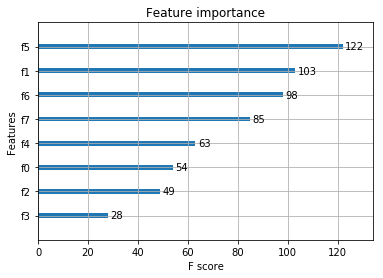

In [28]:
model = XGBClassifier()
model.fit(X, y)
plot_importance(model)
plt.show()

## Use GridSearchCV

In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

In [30]:
learning_rate = [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learning_rate=learning_rate)
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)

In [31]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.483304 using {'learning_rate': 0.1}


In [32]:
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

-0.689811 (0.000475) with: {'learning_rate': 0.0001}
-0.661827 (0.004625) with: {'learning_rate': 0.001}
-0.531155 (0.028945) with: {'learning_rate': 0.01}
-0.483304 (0.055151) with: {'learning_rate': 0.1}
-0.515642 (0.061723) with: {'learning_rate': 0.2}
-0.554158 (0.067557) with: {'learning_rate': 0.3}


In [40]:
learning_rate = [0.01, 0.05, 0.1, 0.15, 0.18]
max_depth = [1, 2, 3, 4, 5, 6, 7, 8]
n_estimators=[50, 80, 100, 120, 150, 200]

param_grid = dict(learning_rate=learning_rate, max_depth=max_depth, n_estimators=n_estimators)

grid_search = GridSearchCV(model, param_grid, scoring="neg_log_loss", n_jobs=-1, cv=kfold)
grid_result = grid_search.fit(X, y)

In [41]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: -0.469025 using {'learning_rate': 0.18, 'max_depth': 1, 'n_estimators': 120}
